In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage as ndi

# Modélisation du problème et premières réfléxions

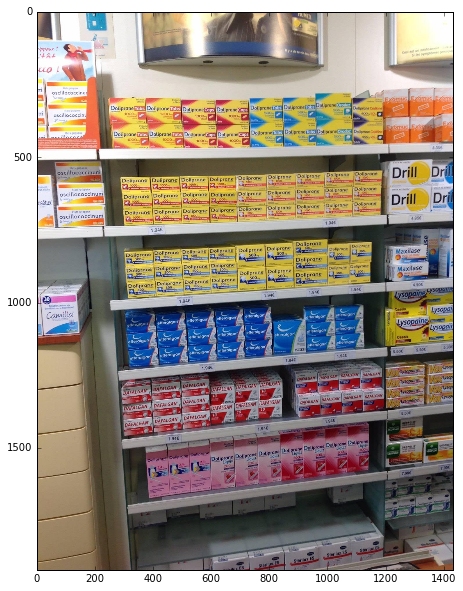

In [23]:
img1 = mpimg.imread('1.jpg')
img2 = mpimg.imread('2.jpg')
img3 = mpimg.imread('3.jpg')
img4 = mpimg.imread('4.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(img1)

On dispose d'image d'étagères de produits de pharmacie, comme sur l'image ci-dessus. L'objectif est de pouvoir détecter la position des étagères. On fera l'hypothèse qu'elles sont toutes horizontales.

# Première approche : Détecteur de Canny

Comme nous en avions parlé, je reprends juste ce travail, pour montrer rapidement en quoi il n'est pas satisfaisant pour notre problème.

In [18]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

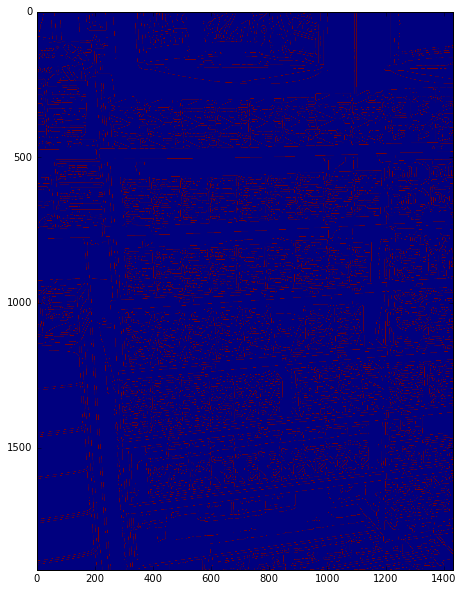

In [36]:
from skimage import feature

img1_bw = rgb2gray(img1)
edges = feature.canny(img1_bw, sigma=3, low_threshold=1, high_threshold=10)
plt.figure(figsize=(10, 10))
plt.imshow(edges)

J'ai essayé de trouver de bons paramètres pour le filtre de Canny à l'oeil sans résultats très concluants.

On voit donc que cette méthode n'est pas une bonne solution pour résoudre ce problème pour 2 raisons:
- le choix des seuils hauts et bas est **très sensible**. Il ne peut pas être fixé
- les boîtes de médicaments individuelles sont au moins autant détectées que les contours qui nous intéressent : les étagères. Ceci rend cette méthode peu pertinente à ce problème.

# Autres approches envisageables